<AxesSubplot:xlabel='Регіон'>

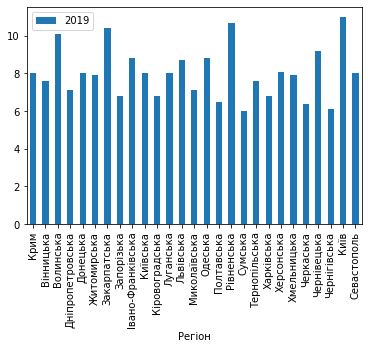

In [8]:
import numpy as np
import pandas as pd


table = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", decimal = ',', thousands = '.')
df = table[10]

#Вывести первые строки таблицы с помощью метода head
#print(df.head(0))

#Определите количество строк и столбцов в датафрейме (атрибут shape)
#print(df.shape)

#Замените в таблице значения "—" на значения NaN
df.replace('—', np.nan, inplace = True)

#Определите типы всех столбцов с помощью dataframe.dtypes
#print(df.dtypes)

#Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"
columns = list(df.columns)
for col in columns:
    if col != 'Регіон':
        df[col] = pd.to_numeric(df[col])   

#Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
for col in columns:
    sum_nan = 0
    for i in df[col].isnull():
        if i:
            sum_nan += 1
    #print(f'{col} NaN percentage: {sum_nan*100/28}')

#Удалите из таблицы данные по всей стране, последняя строчка таблицы
df.drop([27], inplace = True)

#Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)
for col in columns[1:]:
    df[col] = df[col].fillna(df[col].mean())

#Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине
#print(df[df['2019'] > df['2019'].mean()])

#В каком регионе была самая высокая рождаемость в 2014 году?
#print(df[df['2014'] == df['2014'].max()])

#Постройте столбцовую диаграмму рождаемости по регионам в 2019 году
df.plot(x = 'Регіон', y = '2019', kind = 'bar')